## Importing Libraries

In [1]:
import io

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)
# Make sure you are running this in Python3 environment and TFv2.x

2.2.0


## Loading Data

In [2]:
imdb, info = tfds.load(
    "imdb_reviews", 
    with_info=True, 
    as_supervised=True
)
                       
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)                       

## Tokenizing and Embbedding

In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

## De-Tokenizing

In [4]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print('----De-Tokenized----')
print(decode_review(padded[1]), '\n')
print('----De-Tokenized----')
print(training_sentences[1])

----De-Tokenized----
b perhaps because i was so young innocent and <OOV> when i saw it this movie was the cause of many <OOV> nights for me i haven't seen it since i was in seventh grade at a <OOV> school so i am not sure what effect it would have on me now however i will say that it left an impression on me and most of my friends it did serve its purpose at least until we were old enough and <OOV> enough to analyze and create our own opinions i was particularly terrified of what the newly converted post rapture christians had to endure when not receiving the mark of the beast i don't want to spoil the movie 

----De-Tokenized----
b"Perhaps because I was so young, innocent and BRAINWASHED when I saw it, this movie was the cause of many sleepless nights for me. I haven't seen it since I was in seventh grade at a Presbyterian school, so I am not sure what effect it would have on me now. However, I will say that it left an impression on me... and most of my friends. It did serve its purpo

## Building a Model - GRU

In [5]:
# model definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model_gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


## Fitting

In [6]:
num_epochs = 50
history = model_gru.fit(
    padded, 
    training_labels_final, 
    epochs=num_epochs, 
    validation_data=(
        testing_padded, 
        testing_labels_final)
)

Epoch 1/50
782/782 [==============================] - 130s 166ms/step - loss: 0.5262 - accuracy: 0.7094 - val_loss: 0.4091 - val_accuracy: 0.8121
Epoch 2/50
782/782 [==============================] - 127s 162ms/step - loss: 0.3025 - accuracy: 0.8780 - val_loss: 0.3516 - val_accuracy: 0.8503
Epoch 3/50
782/782 [==============================] - 126s 161ms/step - loss: 0.2351 - accuracy: 0.9089 - val_loss: 0.3707 - val_accuracy: 0.8426
Epoch 4/50
782/782 [==============================] - 145s 185ms/step - loss: 0.1828 - accuracy: 0.9323 - val_loss: 0.4541 - val_accuracy: 0.8328
Epoch 5/50
782/782 [==============================] - 138s 176ms/step - loss: 0.1306 - accuracy: 0.9532 - val_loss: 0.5498 - val_accuracy: 0.8111
Epoch 6/50
782/782 [==============================] - 70s 90ms/step - loss: 0.0970 - accuracy: 0.9655 - val_loss: 0.5346 - val_accuracy: 0.8220
Epoch 7/50
782/782 [==============================] - 48s 61ms/step - loss: 0.0664 - accuracy: 0.9778 - val_loss: 0.6927 - val

## Building a Model - LSTM

In [ ]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_lstm.summary()

## Fitting

In [ ]:
num_epochs = 50
history = model_lstm.fit(
    padded, 
    training_labels_final, 
    epochs=num_epochs, 
    validation_data=(
        testing_padded, 
        testing_labels_final
    )
)

## Building a Model - Conv1D

In [ ]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_conv.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_conv.summary()

## Fitting

In [ ]:
num_epochs = 50
history = model_conv.fit(
    padded, 
    training_labels_final, 
    epochs=num_epochs, 
    validation_data=(
        testing_padded, 
        testing_labels_final
    )
)

## Visualising Accuracy and Loss

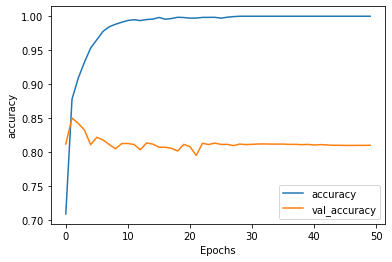

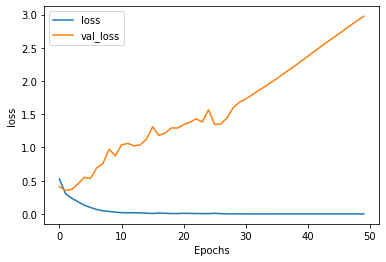

In [9]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')